# HW4

## Задание 1

1.Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.


In [1]:
import os #импортируем нужные модули

import nltk
nltk.download()

from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


2.Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

In [2]:
os.chdir('C:\\Users\\Семья\\python-dh-hw') # указываем текущую директорию

with open('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8', errors='ignore') as f: 
    text = f.read() # открываем файл для чтения
    
punct = ' '.join([word.strip("[\^_`{|}@«»†*—/\-~„“'—=!\"#$%&()*+,-./:;<>?]") for word in text.split()]) # убираем почти всю пунктуацию
b = punct.replace("—","") # длинное тире не убирается со словами (word), поэтому прописываем дополнительно

text1 = b.lower() # приводим к нижнему регистру

tok = word_tokenize(text1) # разбиваем на токены

wnl = WordNetLemmatizer() # лемматизируем, указываем части речи, чтобы лучше распознавались формы
lem1 = [wnl.lemmatize(w, pos = 'v') for w in tok]
lem2 = [wnl.lemmatize(w, pos = 'n') for w in lem1]

fintext =' '.join(lem2) # объединяем в строчку

with open ('Lemmed_HP_SC.txt', 'w', encoding = 'utf-8') as r: # открываем файл для записи 
    for w in fintext:
        r.write(w) # записываем леммы в один файл с названием Lemmed_HP_SC.txt, который появляется в текущей директории

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

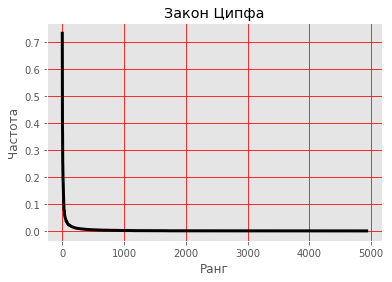

In [3]:
lemmed_text = [] # открываем файл с леммами 
with open('Lemmed_HP_SC.txt', 'r', encoding = 'utf-8') as l:
    for line in l:
        line = line.split()
        for word in line:
            lemmed_text.append(word)

count = {} # считаем абсолютную частоту и сортируем слова
for word in lemmed_text:
    count[word] = count.get(word, 0) + 1
sorted_count = sorted(count.items(), key=lambda x: x[1], reverse=True)

c = 0 # строим график
r = []
q = []
for line in sorted_count:
    c += 1
    r.append(c)
    q.append(line[1]/len(sorted_count))

style.use('ggplot') # оформляем график
plt.plot(r, q, c ='black', linewidth=3)
plt.grid(color='red')
plt.title("Закон Ципфа")
plt.xlabel("Ранг")
plt.ylabel("Частота")
plt.show()

3.Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

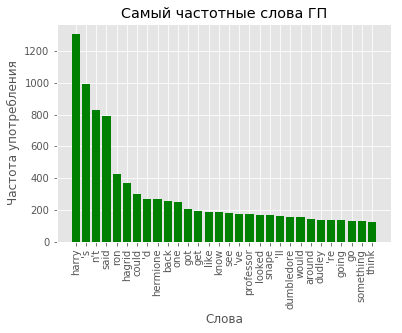

In [4]:
# файл с леммами всё ещё открыт

sw = stopwords.words('english') # удаляем английские стоп-слова, так как текст на английском
filter = ' '.join([w for w in tok if w not in sw])

n={} # задаём словарь для записи значений с абсолютной частотой 
for word in filter.split():
    if word not in n:
        n[word] = 1
    else:
        n[word] += 1

m = sorted(n.items(), key = lambda x: x[1], reverse = True) # сортируем слова из ссловаря

f = dict(sorted(n.items(), key=lambda x: x[1], reverse=True)) # сортированную частоту задаем в словарь

Y = list(f.values()) # задаём числовой список из значений словаря для y и x
SX = list(f.keys())
X = [i for i in range(0,30)]

plt.title("Самый частотные слова ГП") # оформляем график
plt.xlabel("Слова")
plt.ylabel("Частота употребления")
plt.xticks(X, SX, rotation=90) 
plt.bar(X,Y[:30], color='green')
plt.show()